<a href="https://colab.research.google.com/github/oamerl/machine-learning-projects/blob/main/Machine-Learning/speed-dating-match-prediction/Speed_Dating_Match_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2- Data Importing and Understanding 📋💡**


Importing needed libraries


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

Importing the data

In [ ]:
train_data_org = pd.read_csv("/content/train.csv") # reading the training dataset file
test_data = pd.read_csv("/content/test.csv") # reading the testing dataset file

Checking the datatypes and structure

In [ ]:
# printing different info about the trainig set like the data types of features and number of rows and columns
train_data_org.info(verbose = "True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 192 columns):
 #    Column    Dtype  
---   ------    -----  
 0    gender    int64  
 1    idg       int64  
 2    condtn    int64  
 3    wave      int64  
 4    round     int64  
 5    position  int64  
 6    positin1  float64
 7    order     int64  
 8    partner   int64  
 9    pid       float64
 10   match     int64  
 11   int_corr  float64
 12   samerace  int64  
 13   age_o     float64
 14   race_o    float64
 15   pf_o_att  float64
 16   pf_o_sin  float64
 17   pf_o_int  float64
 18   pf_o_fun  float64
 19   pf_o_amb  float64
 20   pf_o_sha  float64
 21   attr_o    float64
 22   sinc_o    float64
 23   intel_o   float64
 24   fun_o     float64
 25   amb_o     float64
 26   shar_o    float64
 27   like_o    float64
 28   prob_o    float64
 29   met_o     float64
 30   age       float64
 31   field     object 
 32   field_cd  float64
 33   undergra  object 
 34   mn_sat    object 
 35 

In [ ]:
# printing the first 6 rows of the training set
train_data_org.head(6)

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
5,0,3,2,14,18,2,2.0,18,8,368.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7126


In [ ]:
train_data_org.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


Checking if there are any null values

In [ ]:
nulls = train_data_org.isnull().sum().sort_values(ascending=False) # nulls per column
nulls[nulls>0] # filtering on columns(features) having missing values

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
            ... 
goal          58
race_o        48
race          45
field         45
pid            8
Length: 181, dtype: int64

Selecting columns with missing values greater than 70% for later usage when we preprocess the data

In [ ]:
# missing values percentage per-column
percent = (train_data_org.isnull().sum()/train_data_org.isnull().count()).sort_values(ascending=False)
missing_values_cols = list(percent[percent>0.7].index) # features with more than 70% of values is missing
print(percent[percent>0]) # printing missing values percentage for features
print(missing_values_cols) # printing features that have more than 70% of data is missing

num_in_3    0.922153
numdat_3    0.820613
expnum      0.783043
amb7_2      0.764766
sinc7_2     0.764766
              ...   
goal        0.009816
race_o      0.008123
race        0.007616
field       0.007616
pid         0.001354
Length: 181, dtype: float64
['num_in_3', 'numdat_3', 'expnum', 'amb7_2', 'sinc7_2', 'shar7_2', 'fun7_2', 'intel7_2', 'attr7_2', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'shar2_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']


Checking traget label "match" distribution. It is clear that the data is severly imbalanced so we should decide how we will handle this later.

In [ ]:
print(train_data_org["match"].value_counts()) # checking the values count of the target label

0    4921
1     988
Name: match, dtype: int64


Text(0, 0.5, 'Count')

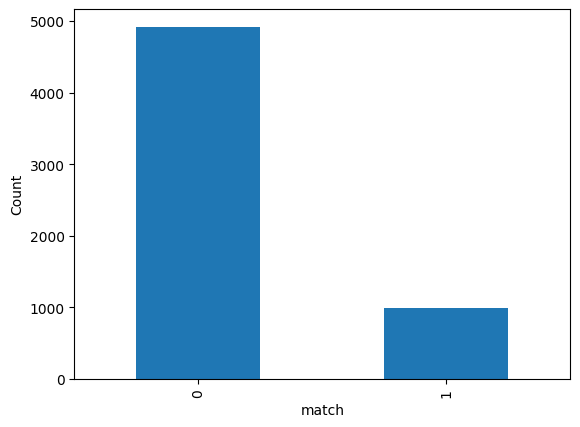

In [ ]:
# plotting the histogram of the target label which is the "match"
plt = train_data_org.match.value_counts().plot(kind = 'bar') # getting the count of different "match" values
plt.set_xlabel('match') # renaming the x-axis
plt.set_ylabel('Count') # renaming the y-axis

Plotting pairwise correlation between features to check if we can agin any insight.
Frim below plot we can notice that there are features that are correlatedwith each other.

<Axes: >

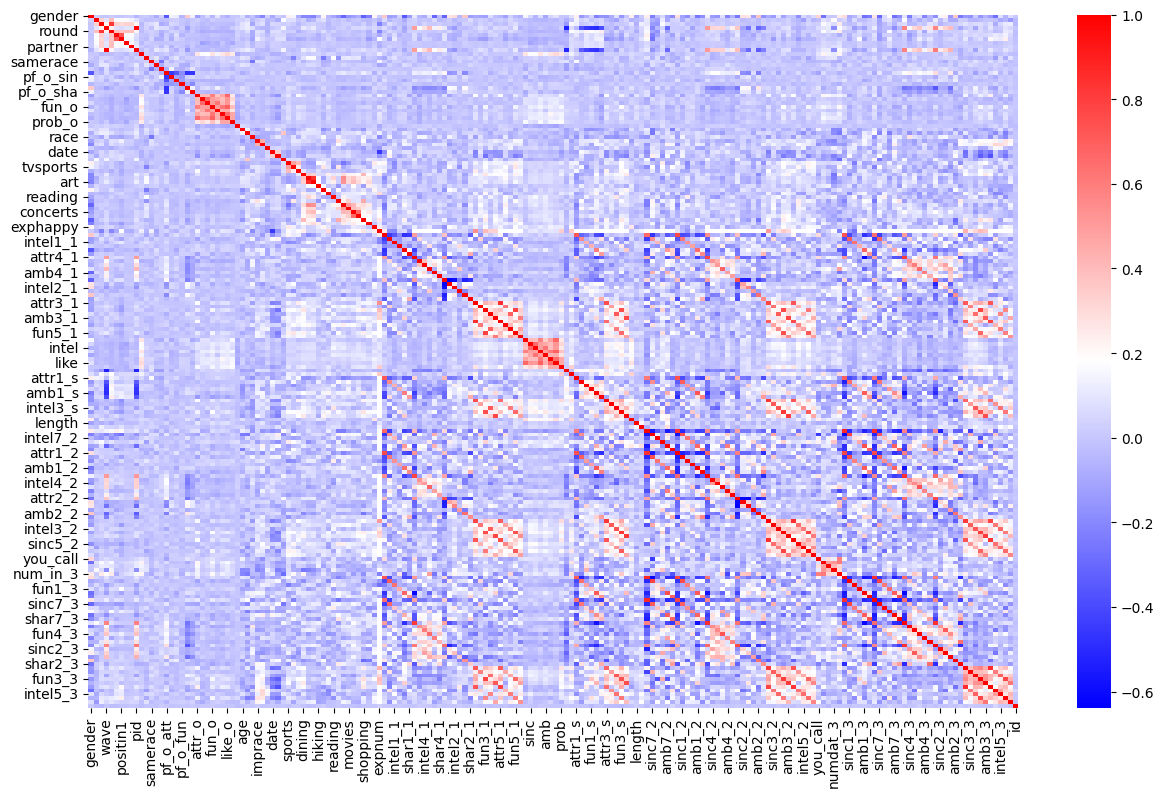

In [ ]:
#importing needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,9)) # changing the figure size for better fitting of the data
sns.heatmap(data = train_data_org.corr(),cmap='bwr') # using seaborn library correlation function

# **3- Data Cleaning/Pre-processing and Pipelines 🛁🧼**

Our data cleaning and pre-processing will consist of two stages:


1.   Manual part in which we apply changes on training and testing sets manually before using pipelines. This stage includes:

*   Setting the record's (sample) "id" as the dataframe index
*   Removing commas from features that should be numeric
*   Dropping unneeded features

2.   The second stage is in which we use piplines to:

*   Fill N/As
*   Encode categorical features
*   Standardize/Normalize numeric features








Before we proceed with any pre-processing we will conserve the "id" of the record as the dataframe index for two reasons, first it wont be considered as a feature and wont be included in training, and second we can retrieve it later during testing when we output the submission file that is be submitted on kaggle.

In [ ]:
train_data = train_data_org.copy() # making a copy of the original dataframe before applying any changes
train_data.set_index('id', inplace = True) # setting the index of the training set dataframe to be the coulmn named "id" such that we don't lose it.
test_data.set_index('id', inplace = True) # setting the index of the testing set dataframe to be the coulmn named "id" such that we don't lose it.

## *3.1) Removing commas from numeric features*

After reading the data description sheet we noticed that there are features that represent numbers but were encoded as object or categorical so we'll change them to float to be numeric as they should be. We also will remove the comma delimeter if existed.

In [ ]:
# showing the pre-mentioned features
train_data[["income", "mn_sat", "tuition"]].head(5)

,income,mn_sat,tuition
id,,,
2583,NaN,"1,290.00","21,645.00"
6830,NaN,NaN,NaN
4840,NaN,NaN,NaN
5508,"45,300.00",NaN,NaN
4828,"46,138.00","1,400.00","26,019.00"


In [ ]:
# as you can see, columns [income, mn_sat, tuition] comes with comma, let's remove it
train_data['income'] = train_data['income'].str.replace(',', '').astype(float)
train_data['mn_sat'] = train_data['mn_sat'].str.replace(',', '').astype(float)
train_data['tuition'] = train_data['tuition'].str.replace(',', '').astype(float)

# applying the same change on the testing data
test_data['income'] = test_data['income'].str.replace(',', '').astype(float)
test_data['mn_sat'] = test_data['mn_sat'].str.replace(',', '').astype(float)
test_data['tuition'] = test_data['tuition'].str.replace(',', '').astype(float)

In [ ]:
# checking if comma is removed successfully
train_data[["income", "mn_sat", "tuition"]].head(5)

,income,mn_sat,tuition
id,,,
2583,NaN,1290.0,21645.0
6830,NaN,NaN,NaN
4840,NaN,NaN,NaN
5508,45300.0,NaN,NaN
4828,46138.0,1400.0,26019.0


## *3.2) Non-important features drop*

*   Here we are defining the unneeded features columns to be dropped
*   These features to drop are either ids,uneffective features, features that have another representation or the features of missing values exceeding 70%


In [ ]:
# manually defined features obtained after reading the data description sheet
features_to_drop = ["idg", "pid", "field", "zipcode","career", "partner","undergra","from"]  # we added two categorial features to drop also (undergra,from)

# then we add the previously found features that have more than 70% missing values to the manually defined colummn
features_to_drop = features_to_drop + missing_values_cols
features_to_drop # showing the features to be dropped

['idg',
 'pid',
 'field',
 'zipcode',
 'career',
 'partner',
 'undergra',
 'from',
 'num_in_3',
 'numdat_3',
 'expnum',
 'amb7_2',
 'sinc7_2',
 'shar7_2',
 'fun7_2',
 'intel7_2',
 'attr7_2',
 'attr7_3',
 'sinc7_3',
 'intel7_3',
 'fun7_3',
 'amb7_3',
 'shar7_3',
 'shar2_3',
 'attr5_3',
 'sinc5_3',
 'intel5_3',
 'fun5_3',
 'amb5_3']

Features drop from training and testing data

In [ ]:
train_data = train_data.drop(features_to_drop, axis=1) # removing the unneeded features from the training set
X_test = test_data.drop(features_to_drop, axis=1) # removing the unneeded features from the testing set

Now we check the nulls after features drop to make sure that features of missing values greater than 70% are not still existent

Nulls count per remaining features

In [ ]:
# missing values count per column
nulls_after_drop = train_data.isnull().sum().sort_values(ascending=False)
nulls_after_drop[nulls_after_drop>0]

sinc2_3     3838
intel4_3    3838
attr4_3     3838
amb2_3      3838
fun2_3      3838
            ... 
exercise      58
clubbing      58
sports        58
race_o        48
race          45
Length: 154, dtype: int64

Nulls percentage per remaining features

In [ ]:
# missing values percentage per column
percent_after_drop = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
percent_after_drop[percent_after_drop>0]

sinc2_3     0.649518
intel4_3    0.649518
attr4_3     0.649518
amb2_3      0.649518
fun2_3      0.649518
              ...   
exercise    0.009816
clubbing    0.009816
sports      0.009816
race_o      0.008123
race        0.007616
Length: 154, dtype: float64

In [ ]:
# printing different info about the training set after features dropping (to check remaining datatypes)
train_data.info(verbose = "True")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 2583 to 8149
Data columns (total 162 columns):
 #    Column    Dtype  
---   ------    -----  
 0    gender    int64  
 1    condtn    int64  
 2    wave      int64  
 3    round     int64  
 4    position  int64  
 5    positin1  float64
 6    order     int64  
 7    match     int64  
 8    int_corr  float64
 9    samerace  int64  
 10   age_o     float64
 11   race_o    float64
 12   pf_o_att  float64
 13   pf_o_sin  float64
 14   pf_o_int  float64
 15   pf_o_fun  float64
 16   pf_o_amb  float64
 17   pf_o_sha  float64
 18   attr_o    float64
 19   sinc_o    float64
 20   intel_o   float64
 21   fun_o     float64
 22   amb_o     float64
 23   shar_o    float64
 24   like_o    float64
 25   prob_o    float64
 26   met_o     float64
 27   age       float64
 28   field_cd  float64
 29   mn_sat    float64
 30   tuition   float64
 31   race      float64
 32   imprace   float64
 33   imprelig  float64
 34   income    float64
 

In [ ]:
# printing different info about the testing set after features dropping
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 934 to 6691
Columns: 163 entries, gender to amb3_3
dtypes: float64(154), int64(7), object(2)
memory usage: 3.1+ MB


## *3.3) Pipelines*
In this part we will be defining 2 pipelines one for numeric features and one for categorical ones responsible for:
*   Filling N/As for numerical and categorical features in which we used KNN imputer.
*   Encoding categorical features with one hot encoding
*   Standardizing/Normalizing numeric features





After reading the data description sheet we extracted categorical features that to be encoded. To decide upon the suitable encoding method we will be checking how many unique values are exsiting for the categorical features to choose whether to use one hot encoding or binary encoder


In [ ]:
print("there are", train_data['condtn'].nunique(), "condtn" + " unique values")
print("there are", train_data['field_cd'].nunique(), "field_cd" + " unique values")
print("there are", train_data['race_o'].nunique(), "race_o" + " unique values")
print("there are", train_data['goal'].nunique(), "goal" + " unique values")
print("there are", train_data['career_c'].nunique(), "career_c" + " unique values")
print("there are", train_data['length'].nunique(), "length" + " unique values")
print("there are", train_data['numdat_2'].nunique(), "numdat_2" + " unique values")
#print("there are", train_data['from'].nunique(), "from" + " unique values") # dropped
#print("there are", train_data['undergra'].nunique(), "undergra" + " unique values") # dropped

there are 2 condtn unique values
there are 18 field_cd unique values
there are 5 race_o unique values
there are 6 goal unique values
there are 17 career_c unique values
there are 3 length unique values
there are 3 numdat_2 unique values


Before dropping "undergra" and "from" features they were having very large number of categories so one hot encoding them will be giving a lot of features and the data will be sparse so instead we tried using binary encoding for them but were faced by some conversion errors so we decided to drop them for now, however the remaining categorical features will be encoded using one hot encoding.

In [ ]:
# selected columns that are representing categorical values to be encoded using one hot encoder
# Note: categorical features ["undergra","from"] were dropped
categorical_features = ["condtn", "field_cd",
                        "race", "race_o",
                        "goal", "career_c",
                        "length", "numdat_2"]

# converting selected categorical features to category datatype for easier filtering in the pipeline
for col_name in train_data.columns:
    if col_name in categorical_features:
        train_data[col_name] = train_data[col_name].astype('category')
        X_test[col_name] = X_test[col_name].astype('category')


In [ ]:
# checking if the type has been changed correctly
features_categorical = list(train_data.select_dtypes(include=['category'])) # returns columns names of datatype category
print(features_categorical)
print(len(features_categorical)) # number of categorical features

['condtn', 'race_o', 'field_cd', 'race', 'goal', 'career_c', 'length', 'numdat_2']
8


In [ ]:
# selecting numeric features for the numeric pipeline
features_numeric = list(train_data.select_dtypes(include=['float64', 'int64'])) # returns columns names of numeric features
features_numeric.remove("match") # removing the target label from the features that will be entered to the numeric pipeline
print(len(features_numeric)) # number of numeric features

153


Checking if features that will be given to pipelines are complete and nothing is missed in the type conversions by comparing with the training set number of columns dimension

In [ ]:
total_number_of_pipeline_features = len(features_categorical) + len(features_numeric) + 1 # the added 1 is for the removed "match" label
total_number_of_pipeline_features == train_data.shape[1] # prints True or False

True

In [ ]:
# printing  the info about the trainig set after setting category features
train_data.info(verbose = "True")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 2583 to 8149
Data columns (total 162 columns):
 #    Column    Dtype   
---   ------    -----   
 0    gender    int64   
 1    condtn    category
 2    wave      int64   
 3    round     int64   
 4    position  int64   
 5    positin1  float64 
 6    order     int64   
 7    match     int64   
 8    int_corr  float64 
 9    samerace  int64   
 10   age_o     float64 
 11   race_o    category
 12   pf_o_att  float64 
 13   pf_o_sin  float64 
 14   pf_o_int  float64 
 15   pf_o_fun  float64 
 16   pf_o_amb  float64 
 17   pf_o_sha  float64 
 18   attr_o    float64 
 19   sinc_o    float64 
 20   intel_o   float64 
 21   fun_o     float64 
 22   amb_o     float64 
 23   shar_o    float64 
 24   like_o    float64 
 25   prob_o    float64 
 26   met_o     float64 
 27   age       float64 
 28   field_cd  category
 29   mn_sat    float64 
 30   tuition   float64 
 31   race      category
 32   imprace   float64 
 33   imprelig

The binary encoder was imported mainly to encode categorical features with large number of classes such as "undergra" and "from" features but encoding was not successfull so both features were dropped and the library was no longer used.

In [ ]:
!pip install category_encoders # installing the library containg the BinaryEncoder
from category_encoders import BinaryEncoder # importing the BinaryEncoder Library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Preprocessing Pipelines Definition

In [ ]:
# importing usual needed libraries
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.impute import KNNImputer

np.random.seed(0) # setting a random seed for reproducibility

# define a pipeline for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('knn_imputer', KNNImputer()), # K of knn will be tuned
        ('scaler', MinMaxScaler()), # scale features to be max of 1 min of 0
        ('normalizer', StandardScaler()) # normalization of features to have mean of 0 and std 1
    ]
)

# define a pipeline for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('knn_imputer', KNNImputer()), # K of knn will be tuned
        ('onehot', OneHotEncoder(handle_unknown='ignore')) # one hot encoding
    ]
)

# define the preprocessor
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical and numerical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric), # numerical pipeline step
        ('cat', transformer_categorical, categorical_features) # categorical pipline step
    ]
)



# **4- Division of training set into training and validation and decoupling the features from the labels ✂️**

Decoupling the training dataset's features matrix and labels vetcor

In [ ]:
y_train = train_data["match"] # target label series
X_train = train_data.drop(['match'], axis=1) # training features df


In [ ]:
X_train.shape # training feature shape

(5909, 161)

In [ ]:
y_train.shape # training label shape

(5909,)

Dividing the Training data into training and validation sets

In [ ]:
# splitting the dataset into 80% training and 20% testing while using stratify to ensure equal class distribution in training and validation sets
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state=10)

print("Training data shape:",X_tr.shape) # printing training data number of rows and coulmns
print("Testing data shape",X_valid.shape) # printing validation data number of rows and coulmns
print("Training labels shape",y_tr.shape) # printing training target label number of rows
print("Testing labels shape",y_valid.shape) # printing validation target label number of rows

Training data shape: (4727, 161)
Testing data shape (1182, 161)
Training labels shape (4727,)
Testing labels shape (1182,)


# **5- Models Training and Evaluation 📈**

During model training we will be either using randomized search cv or bayesian search cv to tune the model hyperparameters as well as the preprocessing hyperparameters, so we will combine the previously defined preprocessing pipeline with different models instance in each trail into a single full pipleine instance that will be given to the hyperparameters search algorithm to train with and find optimal values.

## *5.1) Models 1 & 2 Random Forest*
*   Model 1 uses Random Search
*   Model 2 uses Bayesian Search



Random Forest Full Pipline

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', RandomForestClassifier(), # class_weight = "balanced" was not used
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('normalizer',
                                                                   StandardScaler())]),
                                                  ['gender', 'wave', 'round',
                                                   'position', 'positin1',
                                                   'order', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'met_o', 'age', 'mn_sat',
                                                   'tuition', 'imprace',
                                                   'imprelig', 'income', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condtn', 'field_cd', 'race',
                                                   'race_o', 'goal', 'career_c',
                                                   'length', 'numdat_2'])])),
                ('my_classifier', RandomForestClassifier())])

### Model 1: Random forest using **Randomized Search CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)

# hyperparameters search space of both the model and preprocessing
param_grid = {
    # preprocessing hyperparameters
    'preprocessor__num__knn_imputer__n_neighbors': [3, 5],
    'preprocessor__cat__knn_imputer__n_neighbors': [3, 5],
    # model hyperparameters
    'my_classifier__n_estimators': [20, 50, 100],
    'my_classifier__max_depth':[10, 20, 30]
}

# random forest random search instance
random_search = RandomizedSearchCV(
                                    full_pipline, # pipeline containing the model and preprocessing
                                    param_grid, # pipeline hyperparameters
                                    cv=2, # cv=2 means two-fold cross-validation
                                    verbose=1,
                                    n_jobs=2, # n_jobs means the cuncurrent number of threads (on colab since we only have two cpu cores, we set it to 2)
                                    n_iter=15, # number of trials (hyperparameters combinations to try)
                                    scoring='roc_auc') # scoring metric used to evaluate the cross-validation data with it

# model fitting and training using the training data (will use the optimal hyperparameters that will be found)
random_search.fit(X_tr, y_tr)

print('best score {}'.format(random_search.best_score_)) # getting the best validation AUC score
print('best score {}'.format(random_search.best_params_)) # getting the optimal hyperparameters values found

Fitting 2 folds for each of 15 candidates, totalling 30 fits
best score 0.8473890538087192
best score {'preprocessor__num__knn_imputer__n_neighbors': 5, 'preprocessor__cat__knn_imputer__n_neighbors': 5, 'my_classifier__n_estimators': 100, 'my_classifier__max_depth': 10}


Validation Score

In [ ]:
# the resulting model is the same search instance with the best hyperparameters
# we can use it directly to test the performance on our unseen validation data
y_pred_rf_grid = random_search.predict(X_valid)
auc_rf_grid = roc_auc_score(y_valid, y_pred_rf_grid)
print(auc_rf_grid)

0.7803030303030303


Testing (Predictions of test set)

In [ ]:
submission = pd.DataFrame()
submission['id'] = X_test.index
submission['match'] = random_search.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)


Observations and trial summary

| Aspect                                                	| Comment                                                                                                                                                                  	|
|-------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| _1- Model type_                                          	| Random forest (ensemble)                                                                                                                                                            	|
| _2- Model hyperparameters space_                         	| n_estimators': [20, 50, 100],<br /> max_depth':[10, 20, 30]                                                                                                                                             	|
| _3- Preprocessing hyperparameters space_                 	| n_neighbors': [3, 5] for both numeric and categorical features imputation                                                                                                                                                     	|
| _4- Class imbalance treatment_                 	| Not treated however we could have used class_weight = "balanced" but we discovered the parameter after trial end. <br /> This imbalance issue can be a reason for the low perfromace specially if the testing set contains large number of the under-represented class.                                                                                                                                                   	|
| _5- Optimal hyperparameters found_                       	| 'preprocessor__num__knn_imputer__n_neighbors': 5, --> there is a potential better value, obtained value is on the edge of the provided region<br /> 'preprocessor__cat__knn_imputer__n_neighbors': 5, --> there is a potential better value, obtained value is on the edge of the provided region<br /> 'my_classifier__n_estimators': 100, --> there is a potential better value, obtained value is on the edge of the provided region<br /> 'my_classifier__max_depth': 10 --> there is a potential better value, obtained value is on the edge of the provided region 	|
| _6- Best cross validation AUC score_                     	| 0.84                                                                                                                                                                     	|
| _7- AUC score on held out validation set_                	| 0.78                                                                                                                                                                     	|
| _8- AUC score on kaggle test set (public)_                            | 0.85               |
| _9- Observed performance and thoughts on it_             	|     - First we can notice that the best hyperparameters values lie on the edges of the provided region which means that there is still a room for better hyperparameters <br /> so in the next trial we shall provide another values for all hyperparameters by exploring more values beyond the current defined boundes. <br /> - Secondly we notice that the score on the validation set is close to the best cross validation score but it is less than it with 6% so probably the model is overfitting<br />  (althought we should be comparing by the training score we took the cross validation score for now) so we should introduce regularization parameters into or model <br /> to reduce the overfitting which was only controlled by the maximum depth which is not necessarily representing the complexity of the trees<br /> - We can also notice that the performance on the real (public) test set is quite simialr to the crossvalidation one which might suggest that the model is underfitting! <br /> however we need to choose one reference to tune accordingly either the our held-out validation set or kaggle's public testing set.                                                                                                                                                                       	|
| _10- Reason for changes (if any) and plan for next trial_ 	|                                                                               - Expand the hyperparameters bounds as the found optimal ones during current trial lie in the edges of the defined space <br /> - Add more regularization parameters to the tree to prevent overfitting                                                                                           	|
| _11- Expected outcome_                                    	|                                                                               Obtaining better hyperparameters and reducing the overfitting leading to more generalization capability on test set                                                                                           	|

### Model 2: Random Forest using **Bayesian Search CV**

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import roc_auc_score
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)

# hyperparameters search space of both the model and preprocessing
param_grid = {
    # preprocessing hyperparameters
    'preprocessor__num__knn_imputer__n_neighbors': [5,10],
    'preprocessor__cat__knn_imputer__n_neighbors': [5,10],
    # model hyperparameters
    'my_classifier__n_estimators': [250, 500],
    'my_classifier__max_leaf_nodes': [10, 25, 40],
    'my_classifier__min_samples_split': [10, 50]
}

# random forest bayesian search instance
bayes_search = BayesSearchCV(full_pipline, # pipeline containing the model and preprocessing
                              param_grid, # pipeline hyperparameters
                              cv=2, # cv=2 means two-fold cross-validation
                              verbose=1,
                              n_iter=15, # number of trials (hyperparameters combinations to try)
                              scoring='roc_auc') # scoring metric used to evaluate the cross-validation data with it

# model fitting and training using the training data (will use the optimal hyperparameters that will be found)
bayes_search.fit(X_tr, y_tr)

print('best score {}'.format(bayes_search.best_score_)) # getting best validation AUC score
print('best score {}'.format(bayes_search.best_params_)) # getting the optimal hyperparameters values found

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
best score 0.8565505196894354
best score OrderedDict([('my_classifier__max_leaf_nodes', 40), ('my_classifier__min_s

Validation Score

In [ ]:
# the resulting model is the same search instance with the best hyperparameters
# we can use it directly to test the performance on our unseen validation data
y_pred_rf_bayes = bayes_search.predict(X_valid)
auc_rf_bayes = roc_auc_score(y_valid, y_pred_rf_bayes)
print(auc_rf_bayes)

0.537370657797487


Testing (Predictions of test set)

In [ ]:
submission = pd.DataFrame()
submission['id'] = X_test.index
submission['match'] = bayes_search.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)

Observations and trial summary

| Aspect                                                	| Comment                                                                                                                                                                  	|
|-------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| _1- Model type_                                          	| Random forest (ensemble)                                                                                                                                                          	|
| _2- Model hyperparameters space_                         	| n_estimators': [250, 500], we increased the upper bound towards potentially better values<br /> max_leaf_nodes': [10, 25, 40] (new hyperparameter added for more regularization)<br /> min_samples_split': [10, 50] (new hyperparameter added for more regularization)                                                                                                                                              	|
| _3- Preprocessing hyperparameters space_                 	| n_neighbors': [5, 10] for both numeric and categorical features imputation (we increased the upperbound as this was the direction of potentially better values)                                                                                                                                                     	|
| _4- Class imbalance treatment_                 	| Not treated however we could have used class_weight = "balanced" but we discovered the parameter after trial end. <br /> This imbalance issue can be a reason for the low perfromace specially if the testing set contains large number of the under-represented class.                                                                                                                                                   	|
| _5- Optimal hyperparameters found_                       	| ('my_classifier__max_leaf_nodes', 40), --> there is a potential better value, obtained value is on the edge of the provided region<br /> ('my_classifier__min_samples_split', 10), --> there is a potential better value, obtained value is on the edge of the provided region<br /> ('my_classifier__n_estimators', 500), --> there is a potential better value, obtained value is on the edge of the provided region<br /> ('preprocessor__cat__knn_imputer__n_neighbors', 6),<br /> ('preprocessor__num__knn_imputer__n_neighbors', 10) --> there is a potential better value, obtained value is on the edge of the provided region 	|
| _6- Best cross validation AUC score_                     	| 0.86                                                                                                                                                                     	|
| _7- AUC score on held out validation set_                	| 0.54                                                                                                                                                                     	|
| _8- AUC score on kaggle test set (public)_                            | 0.85               |
| _9- Observed performance and thoughts on it_             	|     - We notice that the found best hyperparameters values still lie on the edges of the provided region which means that there is still more room for better hyperparameters <br /> beyound the current bounds that we can try, We also notice that the score on the validation set became more less than the best cross validation score probably the model is <br /> still overfitting (althought we should be comparing by the training score we took the cross validation score for now) so stronger regularization parameters should be tried <br />- We can also notice similar performance on the real (public) test set as previous trial were metrics are approximately the same so the model is either good fit or underfitting! <br /> - We can't decide actually if 0.85 is bad such that the model is underfitting or if this is the best possible value, but  other people models performance on the leaderboard suggest that our model is indeed underfitting.<br /> - These are contradictory results between our held-out validation set and kaggle's public testing set so we need to choose which one is our reference to tune accordingly and of course it should be the testing set and <br /> better use our held-out validation set as a part of training set and only judge the performance by multiple submissions on the test set.                                                                                                                                                                     	|
| _10- Reason for changes (if any) and plan for next trial_ 	|                                                                               - There is still a room for improving this model however we chose to try another model algorithm in sake of exploration as models performances<br /> - We will be trying boosting technique using xgboosting which will differ from random forest which can been seen as ensemble model of decision trees.                                                                                       	|
| _11- Expected outcome_                                    	|                                                                               We expect xgboosting to have good performance due to our previous experience with it.                                                                                        	|

## *5.2) Model 3 XGBoost Classifier using Bayesian Search (Best performer on Kaggle's private dataset)⭐⭐⭐*

XG Boost Full Pipeline

In [ ]:
from xgboost import XGBClassifier
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', XGBClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('normalizer',
                                                                   StandardScaler())]),
                                                  ['gender', 'wave', 'round',
                                                   'position', 'positin1',
                                                   'order', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'inte...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
from skopt import BayesSearchCV
from sklearn.metrics import roc_auc_score
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)

scale_pos_weight = (train_data_org["match"].value_counts()[1]/train_data_org["match"].value_counts()[0])

# hyperparameters search space of both the model and preprocessing
param_grid = {
    # preprocessing hyperparameters
    'preprocessor__num__knn_imputer__n_neighbors': [5,10],
    'preprocessor__cat__knn_imputer__n_neighbors': [5,10],
    # model hyperparameters
    'my_classifier__learning_rate': [0.01, 0.1],
    'my_classifier__gamma': [0, 0.25],
    'my_classifier__n_estimators': [250, 500],
    'my_classifier__subsample': [0.5, 0.8],
    'my_classifier__colsample_bytree': [0.5, 0.8],
    'my_classifier__scale_pos_weight' : [scale_pos_weight]
}

# XGboost bayesian search instance
bayes_search = BayesSearchCV(full_pipline, # pipeline containing the model and preprocessing
                              param_grid, # pipeline hyperparameters
                              cv=5, # cv=5 means five-fold cross-validation
                              verbose=1,
                              n_jobs=2, # the number of concurrent threads (on colab since we only have two cpu cores, we set it to 2)
                              n_iter=20, # number of trials (hyperparameters combinations to try)
                              scoring='roc_auc') # scoring metric used to evaluate the cross-validation data with it

# model fitting and training using the training data (will use the optimal hyperparameters that will be found)
bayes_search.fit(X_tr, y_tr)

print('best score {}'.format(bayes_search.best_score_)) # getting the best validation AUC score
print('best score {}'.format(bayes_search.best_params_)) # getting the optimal hyperparameters values found

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Validation Score

In [ ]:
# the resulting model is the same search instance with the best hyperparameters
# we can use it directly to test the performance on our unseen validation data
y_pred_xg_bayes = bayes_search.predict(X_valid)
auc_xg_bayes = roc_auc_score(y_valid, y_pred_xg_bayes)
print(auc_xg_bayes)

0.5590816703621582


Testing (Predictions of test set)

In [ ]:
submission = pd.DataFrame()
submission['id'] = X_test.index
submission['match'] = bayes_search.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)


Observations and trial summary

| Aspect                                                	| Comment                                                                                                                                                                  	|
|-------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| _1- Model type_                                          	| XGboost (boosting)                                                                                                                                                            	|
| _2- Model hyperparameters space_                         	| learning_rate': [0.01, 0.1], <br /> gamma': [0, 0.25], <br /> n_estimators': [250, 500], <br /> subsample': [0.5, 0.8], <br /> colsample_bytree': [0.5, 0.8], <br /> scale_pos_weight' : [scale_pos_weight]                                                                                                                                              	|
| _3- Preprocessing hyperparameters space_                 	| n_neighbors': [5, 10] for both numeric and categorical features imputation                                                                                                                                                    	|
| _4- Class imbalance treatment_                 	| Treated with "scale_pos_weight" hyperparameter                                                                                                                                                   	|
| _5- Optimal hyperparameters found_                       	| ('my_classifier__colsample_bytree', 0.5), --> there is a potential better value, obtained value is on the edge of the provided region <br />('my_classifier__gamma', 0.205894966184632),<br /> ('my_classifier__learning_rate', 0.029962060999001054),<br /> ('my_classifier__n_estimators', 250), --> there is a potential better value, obtained value is on the edge of the provided region <br />('my_classifier__scale_pos_weight', 0.20077220077220076), <br />('my_classifier__subsample', 0.789965928292366),<br /> ('preprocessor__cat__knn_imputer__n_neighbors', 5), --> there is a potential better value, obtained value is on the edge of the provided region<br /> ('preprocessor__num__knn_imputer__n_neighbors', 5) --> there is a potential better value, obtained value is on the edge of the provided region	|
| _6- Best cross validation AUC score_                     	| 0.87                                                                                                                                                                     	|
| _7- AUC score on held out validation set_                	| 0.56                                                                                                                                                                     	|
| _8- AUC score on kaggle test set (public)_                            | 0.88               |
| _9- Observed performance and thoughts on it_             	|     - Still some of the obtained values hyperparameters lie on the edge of the provided region so the provided search space is not optimal we we can try <br />different subset in the direction of potential better values <br /> - Judging by the performance on the testing set there is a potential of being slightly underfitting this insight is gained by seeing how others' models are<br /> performing and their maximum obtained score. <br /> - We should be having more complex model so in next trial we will explore different hyperparameters subset towards better fit and we will also use different data<br /> preprocessing in which we will not drop features that have missing values percentage greater than 70% as what we have done with previous models.                                                                                                                                                              	|
| _10- Reason for changes (if any) and plan for next trial_ 	|                                                                               - There is still a room for improving this model hyperparameters<br /> - We will also add more features that were dropped previously as they were having more than 70% of values missing. we will impute them and check the perfromance. .                                                                                       	|
| _11- Expected outcome_                                    	|                                                                               We expect the next model will fit the data more appropriately due to better ranges of hyperparameters and the added features                                                                                        	|

## *5.3) Now we will add the dropped features that had 70% of their values missing and check the performance (New Preprocessing)*

we will re-import the data and do all the previously done changes except for dropping the columns containg missing values greater than 70% in aim of making the model more complex and reduce the underfitting

In [ ]:
train_data_org = pd.read_csv("/content/train.csv") # reading the training dataset file
test_data = pd.read_csv("/content/test.csv") # reading the testing dataset file

train_data = train_data_org.copy() # making a copy before changes
train_data.set_index('id', inplace = True) # setting the index of the training set dataframe to be the coulmn named "id" such that we don't lose it.
test_data.set_index('id', inplace = True) # setting the index of the testing set dataframe to be the coulmn named "id" such that we don't lose it.

train_data['income'] = train_data['income'].str.replace(',', '').astype(float)
train_data['mn_sat'] = train_data['mn_sat'].str.replace(',', '').astype(float)
train_data['tuition'] = train_data['tuition'].str.replace(',', '').astype(float)

test_data['income'] = test_data['income'].str.replace(',', '').astype(float)
test_data['mn_sat'] = test_data['mn_sat'].str.replace(',', '').astype(float)
test_data['tuition'] = test_data['tuition'].str.replace(',', '').astype(float)

features_to_drop = ["idg", "pid", "field", "zipcode","career", "partner","undergra","from"]

train_data = train_data.drop(features_to_drop, axis=1) # removing the unneeded features from the training set
X_test = test_data.drop(features_to_drop, axis=1) # removing the unneeded features from the testing set

# selected columns that are representing categorical values to encoded using one hot encoder
categorical_features = ["condtn", "field_cd",
                       "race", "race_o", "goal",
                       "career_c", "length", "numdat_2"]

# categorical features to be dropped ["undergra","from"]

for col_name in train_data.columns:
    if col_name in categorical_features:
        train_data[col_name] = train_data[col_name].astype('category')
        X_test[col_name] = X_test[col_name].astype('category')

# selecting numeric features
features_numeric = list(train_data.select_dtypes(include=['float64', 'int64'])) # returns coulmns names
features_numeric.remove("match")
print(len(features_numeric))

y_train = train_data["match"] # target label series
X_train = train_data.drop(['match'], axis=1) # training features df

# splitting the dataset into 80% training and 20% testing while using stratify to ensure equal class distribution in training and validation sets
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state=10)

174


redefine the pipelines

In [ ]:
np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('knn_imputer', KNNImputer()), # K will be searched for
        ('scaler', MinMaxScaler()), # scale features to be max of 1 min of 0
        ('normalizer', StandardScaler()) # normalization of features to have mean of 0 and std 1
    ]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('knn_imputer', KNNImputer()), # K will be searched for
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


# define the preprocessor
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, categorical_features)
    ]
)


## *5.4) Model 6 XGBoost Classifier using Bayesian Search (without null features drop)*

XG Boost Full Pipeline

In [ ]:
from xgboost import XGBClassifier
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', XGBClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('normalizer',
                                                                   StandardScaler())]),
                                                  ['gender', 'wave', 'round',
                                                   'position', 'positin1',
                                                   'order', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'inte...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
from skopt import BayesSearchCV
from sklearn.metrics import roc_auc_score
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)

scale_pos_weight = (train_data_org["match"].value_counts()[1]/train_data_org["match"].value_counts()[0])

# hyperparameters search space of both the model and preprocessing
param_grid = {
    # preprocessing hyperparameters
    'preprocessor__num__knn_imputer__n_neighbors': [5],
    'preprocessor__cat__knn_imputer__n_neighbors': [5],
    # model hyperparameters
    'my_classifier__learning_rate': [0.01, 0.1],
    'my_classifier__gamma': [0.20],
    'my_classifier__n_estimators': [100, 250, 500],
    'my_classifier__subsample': [0.5, 0.8],
    'my_classifier__colsample_bytree': [0.5, 0.8],
    'my_classifier__scale_pos_weight' : [scale_pos_weight**2]
}

# XGboost bayesian search instance
bayes_search = BayesSearchCV(full_pipline, # pipeline containing the model and preprocessing
                              param_grid, # pipeline hyperparameters
                              cv=5, # five-fold cross-validation
                              verbose=1,
                              n_jobs=2, # number of concurrent threads, colab have two cpu cores, we set it to 2
                              n_iter=10, # number of trials (hyperparameters combinations to try)
                              scoring='roc_auc') # scoring metric used to evaluate the cross-validation data with it

# model fitting and training using the training data (will use the optimal hyperparameters that will be found)
bayes_search.fit(X_tr, y_tr)

print('best score {}'.format(bayes_search.best_score_)) # getting the best validation AUC score
print('best score {}'.format(bayes_search.best_params_)) # getting the optimal hyperparameters values found

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
best score 0.8649430694490018
best score OrderedDict([('my_classifier__colsample_bytree', 0.7627650274405504), ('my_classifier__gamma', 0.2), ('my_classifier__learning_rate', 0.06535867808092242), ('my_classifier__n_estimators', 250), ('my_classifier__scale_pos_weight', 0.04030947660291289), ('my_classifier__subsample', 0.762510161502491), ('preprocessor__cat__knn_imputer__n_neighbors', 5), ('preprocessor__

Validation Score

In [ ]:
# the resulting model is the same search instance with the best hyperparameters
# we can use it directly to test the performance on our unseen validation data
y_pred_xg_bayes = bayes_search.predict(X_valid)
auc_xg_bayes = roc_auc_score(y_valid, y_pred_xg_bayes)
print(auc_xg_bayes)

0.5328282828282829


Testing (Predictions of test set)

In [ ]:
submission = pd.DataFrame()
submission['id'] = X_test.index
submission['match'] = bayes_search.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)


Observations and trial summary

| Aspect                                                	| Comment                                                                                                                                                                  	|
|-------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| _1- Model type_                                          	| XGboost (boosting)                                                                                                                                                            	|
| _2- Model hyperparameters space_                         	| learning_rate': [0.01, 0.1], <br /> gamma': [0.20], --> set to previously found optimal value <br /> n_estimators': [100, 250, 500], --> decreased the lower bound in the direction of potentail better values <br /> subsample': [0.5, 0.8], <br /> colsample_bytree': [0.5, 0.8], <br /> scale_pos_weight' : [scale_pos_weight**2] --> used the square of the parameter for better compenstaion of the under-represented class                                                                                                                                              	|
| _3- Preprocessing hyperparameters space_                 	| n_neighbors': [5] for both numeric and categorical features imputation                                                                                                                                                    	|
| _4- Class imbalance treatment_                 	| Treated with "scale_pos_weight" hyperparameter.                                                                                                                                                   	|
| _5- Optimal hyperparameters found_                       	| ('my_classifier__colsample_bytree', 0.76), <br />('my_classifier__gamma', 0.2),<br /> ('my_classifier__learning_rate', 0.065),<br /> ('my_classifier__n_estimators', 250), <br />('my_classifier__scale_pos_weight', 0.04), <br />('my_classifier__subsample', 0.76),<br /> ('preprocessor__cat__knn_imputer__n_neighbors', 5),<br /> ('preprocessor__num__knn_imputer__n_neighbors', 5)	|
| _6- Best cross validation AUC score_                     	| 0.86                                                                                                                                                                     	|
| _7- AUC score on held out validation set_                	| 0.53                                                                                                                                                                     	|
| _8- AUC score on kaggle test set (public)_                            | 0.87               |
| _9- Observed performance and thoughts on it_             	|     - The model is still underfitting as it can be noticed even after we added more features, maybe we should provide more percentage values for "subsample" and <br />"colsample_bytree" hyperparameters, we can try using 100% of features and training examples for each tree.                                                                                                                                                               	|
| _10- Reason for changes (if any) and plan for next trial_ 	|                                                                               - The model is not complex enough and we need to explore wider range of hyperparameters or decrease the parameters that are regularizing the tree. <br />however we will try another classification algorithms to check their performance. We will begin with SVM classifier.                                                                                   	|
| _11- Expected outcome_                                    	|                                                                               We expect the next SVC model will have good performace as it usually scales relatively well to high dimensional data                                                                                        	|

## *5.5) Model 4 SVM Classifier Using Randomized Search (without null features drop)*

SVC Full Pipeline

In [ ]:
from sklearn.svm import SVC
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', SVC(class_weight = "balanced"),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('normalizer',
                                                                   StandardScaler())]),
                                                  ['gender', 'wave', 'round',
                                                   'position', 'positin1',
                                                   'order', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'met_o', 'age', 'mn_sat',
                                                   'tuition', 'imprace',
                                                   'imprelig', 'income', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condtn', 'field_cd', 'race',
                                                   'race_o', 'goal', 'career_c',
                                                   'length', 'numdat_2'])])),
                ('my_classifier', SVC(class_weight='balanced'))])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)

# hyperparameters search space of both the model and preprocessing
param_grid = {
    # preprocessing hyperparameters
    'preprocessor__num__knn_imputer__n_neighbors': [5,10],
    'preprocessor__cat__knn_imputer__n_neighbors': [5,10],
    # model hyperparameters
    'my_classifier__kernel': ("rbf", "poly"),
    'my_classifier__C': [0.1, 1, 10],
    'my_classifier__degree': [3, 5],
    'my_classifier__probability' : [True]
}

# SVC randomized search instance
random_search = RandomizedSearchCV(full_pipline, # pipeline containing the model and preprocessing
                                  param_grid, # pipeline hyperparameters
                                  cv=5, # five-fold cross-validation
                                  verbose=1,
                                  n_jobs=2, # number of concurrent threads, colab have two cpu cores, we set it to 2
                                  n_iter=10, # number of trials (hyperparameters combinations to try)
                                  scoring='roc_auc') # scoring metric used to evaluate the cross-validation data with it

# model fitting and training using the training data (will use the optimal hyperparameters that will be found)
random_search.fit(X_tr, y_tr)

print('best score {}'.format(random_search.best_score_)) # getting the best validation AUC score
print('best score {}'.format(random_search.best_params_)) # getting the optimal hyperparameters values found

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score 0.8461929117712399
best score {'preprocessor__num__knn_imputer__n_neighbors': 10, 'preprocessor__cat__knn_imputer__n_neighbors': 10, 'my_classifier__probability': True, 'my_classifier__kernel': 'rbf', 'my_classifier__degree': 3, 'my_classifier__C': 1}


Validation Score

In [ ]:
# the resulting model is the same search instance with the best hyperparameters
# we can use it directly to test the performance on our unseen validation data
y_pred_svc_random = random_search.predict(X_valid)
auc_svc_random = roc_auc_score(y_valid, y_pred_svc_random)
print(auc_svc_random)

0.774128479921163


Testing (Predictions of test set)

In [ ]:
submission = pd.DataFrame()
submission['id'] = X_test.index
submission['match'] = random_search.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)

Observations and trial summary

| Aspect                                                	| Comment                                                                                                                                                                  	|
|-------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| _1- Model type_                                          	| SVM Classifier                                                                                                                                                           	|
| _2- Model hyperparameters space_                         	| kernel: ("rbf", "poly") <br /> C: [0.1, 1, 10], <br /> degree': [3, 5], <br />  probability' : [True]                                                                                                                                            	|
| _3- Preprocessing hyperparameters space_                 	| n_neighbors': [5,10] for both numeric and categorical features imputation                                                                                                                                                    	|
| _4- Class imbalance treatment_                 	| Treated with "class_weight = "balanced"" hyperparameter.                                                                                                                                                   	|
| _5- Optimal hyperparameters found_                       	| 'preprocessor__num__knn_imputer__n_neighbors': 10, --> there is a potential better value, obtained value is on the edge of the provided region<br /> 'preprocessor__cat__knn_imputer__n_neighbors': 10, --> there is a potential better value, obtained value is on the edge of the provided region<br /> 'my_classifier__probability': True,<br /> 'my_classifier__kernel': 'rbf',<br /> 'my_classifier__degree': 3, --> there is a potential better value, obtained value is on the edge of the provided region<br /> 'my_classifier__C': 1	|
| _6- Best cross validation AUC score_                     	| 0.85                                                                                                                                                                     	|
| _7- AUC score on held out validation set_                	| 0.77                                                                                                                                                                     	|
| _8- AUC score on kaggle test set (public)_                            | 0.86               |
| _9- Observed performance and thoughts on it_             	|     - The model is still underfitting as it can be noticed even after we added more features, maybe we should use higher values of "C" to reduce the margin and potentially fit the data appropriately                                                                                                                                                               	|
| _10- Reason for changes (if any) and plan for next trial_ 	|                                                                               - The model is not complex enough and we need to explore other different values of "C" typically higher values for narrower margin or even different kernels . <br />however we will try a final basic classification algorithms which is the logistic regression to see how will it perform compared by the previously tried models which were supposedly more complex                                                                                 	|
| _11- Expected outcome_                                    	|                                                                               We actually haven't tried logistic regression extensively before to have a guess about how will it perform but we know that it is widely used or usually is tried as a first model so we guess it will be <br /> good but not better than XGboost or random forest for example.                                                                                     	|

## *5.6) Model 5 Logistic Regression using Bayesian Search (without null features drop)*

Logistic Regression full pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', LogisticRegression(class_weight = "balanced"),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('normalizer',
                                                                   StandardScaler())]),
                                                  ['gender', 'wave', 'round',
                                                   'position', 'positin1',
                                                   'order', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'inte...amb_o',
                                                   'shar_o', 'like_o', 'prob_o',
                                                   'met_o', 'age', 'mn_sat',
                                                   'tuition', 'imprace',
                                                   'imprelig', 'income', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condtn', 'field_cd', 'race',
                                                   'race_o', 'goal', 'career_c',
                                                   'length', 'numdat_2'])])),
                ('my_classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
from skopt import BayesSearchCV
from sklearn.metrics import roc_auc_score
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)

# hyperparameters search space of both the model and preprocessing
param_grid = {
    # preprocessing hyperparameters
    'preprocessor__num__knn_imputer__n_neighbors': [5,10],
    'preprocessor__cat__knn_imputer__n_neighbors': [5,10],
    # model hyperparameters
    'my_classifier__penalty': ["l2"],
    'my_classifier__C': [0.01, 0.1, 1],
    'my_classifier__max_iter': [10000],
    'my_classifier__solver': ["newton-cholesky", "saga", "lbfgs"]

}

# logistic regression bayesian search instance
bayes_search = BayesSearchCV(full_pipline, # pipeline containing the model and preprocessing
                            param_grid, # pipeline hyperparameters
                            cv=5, # five-fold cross-validation
                            verbose=1,
                            n_jobs=2, # number of concurrent threads, colab have two cpu cores, we set it to 2
                            n_iter=10, # number of trials (hyperparameters combinations to try)
                            scoring='roc_auc') # scoring metric used to evaluate the cross-validation data with it

# model fitting and training using the training data (will use the optimal hyperparameters that will be found)
bayes_search.fit(X_tr, y_tr)

print('best score {}'.format(bayes_search.best_score_)) # getting the best validation AUC score
print('best score {}'.format(bayes_search.best_params_)) # getting the optimal hyperparameters values found

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
best score 0.8588512539229616
best score OrderedDict([('my_classifier__C', 0.01), ('my_classifier__max_iter', 10000), ('my_classifier__penalty', 'l2'), ('my_classifier__solver', 'saga'), ('preprocessor__cat__knn_imputer__n_neighbors', 7), ('preprocessor__num__knn_imputer__n_neighbors', 8)])


Validation Score

In [ ]:
# the resulting model is the same search instance with the best hyperparameters
# we can use it directly to test the performance on our unseen validation data
y_pred_logreg_bayes = bayes_search.predict(X_valid)
auc_logreg_bayes = roc_auc_score(y_valid, y_pred_logreg_bayes)
print(auc_logreg_bayes)

0.7942689085981769


Testing (Predictions of test set)

In [ ]:
submission = pd.DataFrame()
submission['id'] = X_test.index
submission['match'] = bayes_search.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)

Observations and trial summary

| Aspect                                                	| Comment                                                                                                                                                                  	|
|-------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| _1- Model type_                                          	| Logistic Regression                                                                                                                                                           	|
| _2- Model hyperparameters space_                         	| penalty': ["l2"] <br /> C: [0.01, 0.1, 1], <br /> max_iter: [10000], <br />  solver': ["newton-cholesky", "saga", "lbfgs"]                                                                                                                                            	|
| _3- Preprocessing hyperparameters space_                 	| n_neighbors': [5,10] for both numeric and categorical features imputation                                                                                                                                                    	|
| _4- Class imbalance treatment_                 	| Treated with "class_weight = "balanced"" hyperparameter.                                                                                                                                                   	|
| _5- Optimal hyperparameters found_                       	| ('my_classifier__C', 0.01), --> there is a potential better value, obtained value is on the edge of the provided region<br /> ('my_classifier__max_iter', 10000),<br /> ('my_classifier__penalty', 'l2'),<br /> ('my_classifier__solver', 'saga'),<br /> ('preprocessor__cat__knn_imputer__n_neighbors', 7),<br /> ('preprocessor__num__knn_imputer__n_neighbors', 8)	|
| _6- Best cross validation AUC score_                     	| 0.86                                                                                                                                                                     	|
| _7- AUC score on held out validation set_                	| 0.79                                                                                                                                                                     	|
| _8- AUC score on kaggle test set (public)_                            | 0.85               |
| _9- Observed performance and thoughts on it_             	|     - The model is also underfitting so we can remove the L2 regularization and check the perfromance                                                                                                                                                               	|
| _10- Reason for changes (if any) and plan for next trial_ 	|                                                                               - The model is not complex enough so we need to reduce the regularization introduced by L2 and check the perfromance                                                                                 	|
| _11- Expected outcome_                                    	|                                                                               We expect better performance as the current perfromance it not really bad knowing that the best attainable AUC score is something in order of 0.89                                                                                     	|

Final Thoughts:
we think that since most of the models were underfitting, the dropped categorical features named "undergra" and "from" which represent the school attended for undergraduate degree and from where they were originally, could be really capturing important info or relations for the model and unfortunately we have dropped them. If we think about it these two features can actually be important criteria for some people when choosing a mate.